In [1]:
import os
import _pickle as pickle
import numpy as np
import scipy.stats as stats

Results = {'TTC' : {}, "parameters" : {}, 'ACC' : {}}

for folder in os.listdir("Results/"):
    if "DS_Store" not in folder:
        for file in os.listdir(f"Results/{folder}"):
            if "DS_Store" not in file:
                with open(f'Results/{folder}/{file}', 'rb') as f:
                    Temp_Results = pickle.load(f)
                    Results["TTC"][file] = Temp_Results["TTC"][f"Results/{folder}/{file}"]
                    Results["ACC"][file] = Temp_Results["ACC"][f"Results/{folder}/{file}"]
                    Results["parameters"][file] = Temp_Results["parameters"]

# Time to consensus

2.158531042129698e-160 
 8.453184467774037e-39
40.0 140.0 100.0 

3.0049732482005915e-61 
 9.288369834102538e-09
100.0 180.0 220.0 

1.8184693840662464e-70 
 2.3912945503400537e-13
268.0 393.0 448.0 



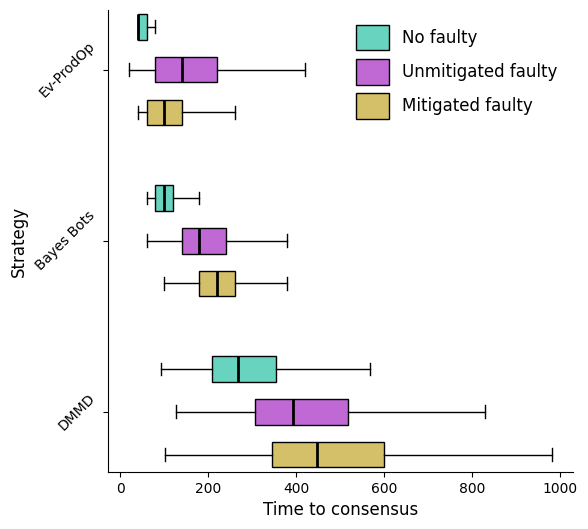

In [10]:
# 1 graph, with three clusters of box plots
# - No faulty agents
# - Mitigated faulty agents
# - Unmitigated faulty agents

import matplotlib.pyplot as plt

# Set up graph
fig, ax = plt.subplots(1,1, figsize = (6,6), dpi=100)

positions = np.array([12, 11.75, 11.5])

# Define hatch patterns
hatch_patterns = ['.', 'o', 'x']#, '-', '|', 'o', '*']
colours = [np.array((104, 212, 192))/255, np.array((192, 104, 212))/255, np.array((212, 192, 104))/255]


# Plot data
for i, decision_strategy in enumerate(["SProdOp", "BBots", "DMMD"]):
    # Non faulty
    ttcs = (Results['TTC'][decision_strategy+"-NF"], # No faulty agents
                Results['TTC'][decision_strategy+"-F"],  # Unmitigated faulty agents
                Results['TTC'][decision_strategy+"-MF"])  # Mitigated faulty agents
    
    box = ax.boxplot(ttcs, 
                vert=False, positions=positions, sym='',
                patch_artist=True,
                medianprops=dict(color='black',linewidth=2))
    
    t_val1, p_val1 = stats.ttest_rel(ttcs[0], ttcs[1])
    t_val2, p_val2 = stats.ttest_rel(ttcs[1], ttcs[2])

    print(p_val1, "\n", p_val2)

    """
    ax.text(np.min(ttcs[0]), positions[0]-0.15, f"t_val = {t_val1:.3g}, p_val = {p_val1:.3e}", fontsize=9)
    ax.text(np.min(ttcs[1]), positions[1]-0.15, f"t_val = {t_val2:.3g}, p_val = {p_val2:.3e}", fontsize=9)
    """
    
    print(np.median(Results['TTC'][decision_strategy+"-NF"]), # No faulty agents
    np.median(Results['TTC'][decision_strategy+"-F"]),  # Unmitigated faulty agents
    np.median(Results['TTC'][decision_strategy+"-MF"]), "\n")
    
    positions -= 1
    

    # Set colours
    for i in range(3):
        box['boxes'][i].set_facecolor(colours[i])  # Set box fill color to white
        box['boxes'][i].set_edgecolor('black')  # Set box edge color to black

        #box['boxes'][1].set_hatch(hatch_patterns[1])
        #box['boxes'][2].set_hatch(hatch_patterns[2])

ax.legend([box['boxes'][0], box['boxes'][1], box['boxes'][2]], 
          ['No faulty', 'Unmitigated faulty', 'Mitigated faulty'],
          fontsize='large',
          handlelength=2,
          handleheight=2,
          frameon = False)
    

# Format
#decision_methods = ["SProdOp", "BBots", "DMMD"]


ax.set_ylim(9.4,12.1)


ax.set_yticks([11.75, 10.75, 9.75])
ax.set_yticklabels(['Ev-ProdOp', 'Bayes Bots', 'DMMD'], rotation=45, ha='right', va='center')

ax.set_xlabel('Time to consensus', fontsize=12)
ax.set_ylabel("Strategy", fontsize=12)
    

plt.savefig('Plots/ttcs.pdf', dpi=600,bbox_inches='tight', pad_inches=0.1)
plt.show()




In [3]:
accuracy_scores = []

for key, i in Results['ACC'].items():
    if "MF" in key or "NF" in key or key[-2:] == "-F":
        accuracy_scores.append(key + " " + str(i))

accuracy_scores.sort(reverse=True)

for x in accuracy_scores : print(x)

SProdOp-NF 1.0
SProdOp-MF 1.0
SProdOp-F 0.306
DMMD-NF 0.904
DMMD-MF 0.575
DMMD-F 0.323
BBots-NF 0.978
BBots-MF 0.993
BBots-F 0.857


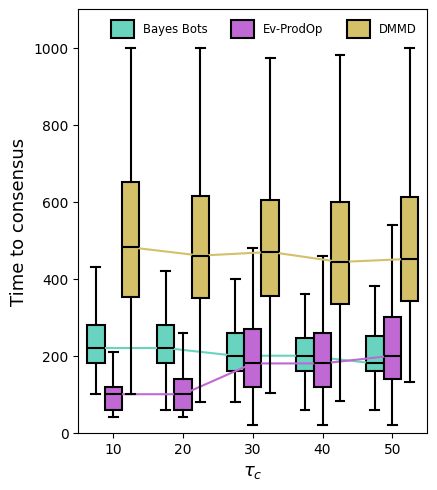

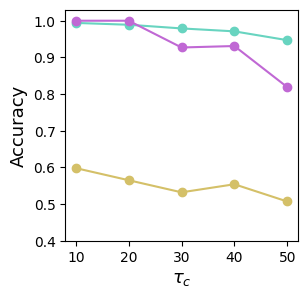

In [4]:
import matplotlib.pyplot as plt

sparameters = ['10', '20', '30', '40', '50']

positions = np.array((0.5, 2.5, 4.5, 6.5, 8.5))

# Set up graph
fig1, ax1 = plt.subplots(1,1, figsize = (4.5,5.5), dpi=100)
fig2, ax2 = plt.subplots(1,1, figsize = (3,3), dpi=100)

boxeses = []

txtPos = {'BBo' : (1.5, 900), 'SPr' : (1.5, 800), 'DMM' : (1.5, 700)}

for i, strategy in enumerate(['BBots-FSR-', 'SProdOp-FSR-', 'DMMD-FSR-']):
    ttcs = []
    accs = []
    for parameter in sparameters:
        time_to = Results['TTC'][strategy + parameter]
        acc = Results['ACC'][strategy + parameter]
        accs.append(acc)
        ttcs.append(time_to)
        
    boxes = ax1.boxplot(ttcs, sym="", positions=positions, patch_artist=True, whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), flierprops=dict(linewidth=1.5), medianprops=dict(color='black', linewidth=1.5), boxprops=dict(facecolor = colours[i], linewidth=1.5))
    ax1.plot(positions, [np.median(ttc) for ttc in ttcs], color=colours[i])
    ax2.plot(accs, marker='o', color=colours[i])

    """
    for ii in range(4):
        t_val, p_val = stats.ttest_rel(ttcs[ii], ttcs[ii+1])
        ax1.text(txtPos[strategy[:3]][0]+0.07+(2*ii), txtPos[strategy[:3]][1], f"t_val = {t_val:.2f}\np_val = {p_val:.1e}", fontsize=6)

    ax1.text(0.05, txtPos[strategy[:3]][1]+10, f"{['Bayes Bots', 'Ev-ProdOp', 'DMMD'][i]}: ", fontsize=6)
    """

    boxeses.append(boxes['boxes'][0])

    positions += 0.5

ax1.legend(boxeses,
          ['Bayes Bots', 'Ev-ProdOp', 'DMMD'],
          ncols=3,
          fontsize='small',
          handlelength=2,
          handleheight=2,
          frameon = False)


# Formatting
ax1.set_xticks([1,3,5,7,9])
ax1.set_xticklabels(sparameters)
ax1.set_ylabel('Time to consensus', fontsize=13)
ax1.set_xlabel('$τ_c$', fontsize=13)
ax1.set_ylim(0, 1100)

ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels(sparameters)
ax2.set_ylabel('Accuracy', fontsize=13)
ax2.set_xlabel('$τ_c$', fontsize=13)
ax2.set_ylim(0.4, 1.03)

fig1.savefig(f"Plots/FSR1.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
fig2.savefig(f"Plots/FSR2.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

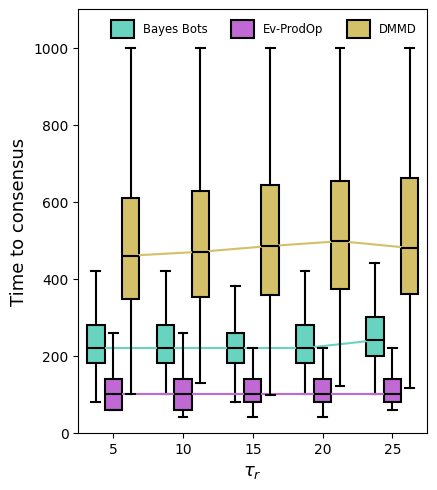

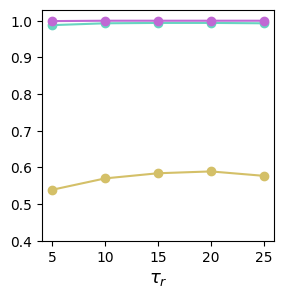

In [5]:
import matplotlib.pyplot as plt

sparameters = ['5', '10', '15', '20', '25']

positions = np.array((0.5, 2.5, 4.5, 6.5, 8.5))

# Set up graph
fig1, ax1 = plt.subplots(1,1, figsize = (4.5,5.5), dpi=100)
fig2, ax2 = plt.subplots(1,1, figsize = (3,3), dpi=100)

boxeses = []

for i, strategy in enumerate(['BBots-DCR-', 'SProdOp-DCR-', 'DMMD-DCR-']):
    ttcs = []
    accs = []
    for parameter in sparameters:
        time_to = Results['TTC'][strategy + parameter]
        acc = Results['ACC'][strategy + parameter]
        accs.append(acc)
        ttcs.append(time_to)
        
    boxes = ax1.boxplot(ttcs, sym="", positions=positions, patch_artist=True, whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), flierprops=dict(linewidth=1.5), medianprops=dict(color='black', linewidth=1.5), boxprops=dict(facecolor = colours[i], linewidth=1.5))
    ax1.plot(positions, [np.median(ttc) for ttc in ttcs], color=colours[i])
    ax2.plot(accs, marker='o', color=colours[i])

    """
    for ii in range(4):
        t_val, p_val = stats.ttest_rel(ttcs[ii], ttcs[ii+1])
        ax1.text(txtPos[strategy[:3]][0]+0.07+(2*ii), txtPos[strategy[:3]][1]+55, f"t_val = {t_val:.2f}\np_val = {p_val:.1e}", fontsize=6)

    ax1.text(0.05, txtPos[strategy[:3]][1]+65, f"{['Bayes Bots', 'Ev-ProdOp', 'DMMD'][i]}: ", fontsize=6)
    """

    boxeses.append(boxes['boxes'][0])

    positions += 0.5

ax1.legend(boxeses,
          ['Bayes Bots', 'Ev-ProdOp', 'DMMD'],
          ncols=3,
          fontsize='small',
          handlelength=2,
          handleheight=2,
          frameon = False)


# Formatting
ax1.set_xticks([1,3,5,7,9])
ax1.set_xticklabels(sparameters)
ax1.set_ylabel('Time to consensus', fontsize=13)
ax1.set_xlabel('$τ_r$', fontsize=13)
ax1.set_ylim(0, 1100)

ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels(sparameters)
#ax2.set_ylabel('Accuracy')
ax2.set_xlabel('$τ_r$', fontsize=13)
ax2.set_ylim(0.4, 1.03)

fig1.savefig(f"Plots/DCR1.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
fig2.savefig(f"Plots/DCR2.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

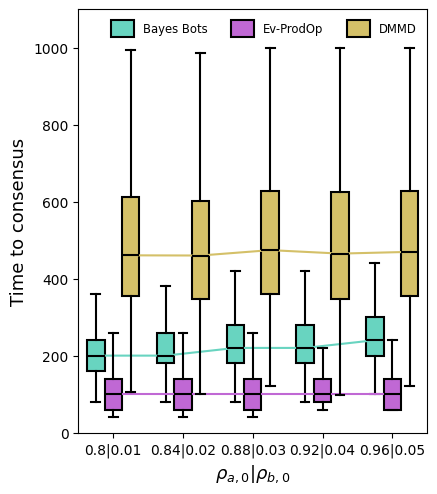

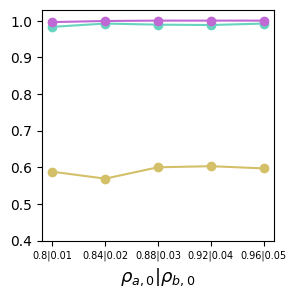

In [6]:
import matplotlib.pyplot as plt

sparameters = ['80-1', '84-2', '88-3', '92-4', '96-5']

positions = np.array((0.5, 2.5, 4.5, 6.5, 8.5))

# Set up graph
fig1, ax1 = plt.subplots(1,1, figsize = (4.5,5.5), dpi=100)
fig2, ax2 = plt.subplots(1,1, figsize = (3,3), dpi=100)

boxeses = []

for i, strategy in enumerate(['BBots-', 'SProdOp-', 'DMMD-']):
    ttcs = []
    accs = []
    for parameter in sparameters:
        time_to = Results['TTC'][strategy + parameter]
        acc = Results['ACC'][strategy + parameter]
        accs.append(acc)
        ttcs.append(time_to)
        
    boxes = ax1.boxplot(ttcs, sym="", positions=positions, patch_artist=True, whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), flierprops=dict(linewidth=1.5), medianprops=dict(color='black', linewidth=1.5), boxprops=dict(facecolor = colours[i], linewidth=1.5))
    ax1.plot(positions, [np.median(ttc) for ttc in ttcs], color=colours[i])
    ax2.plot(accs, marker='o', color=colours[i])

    """
    for ii in range(4):
        t_val, p_val = stats.ttest_rel(ttcs[ii], ttcs[ii+1])
        ax1.text(txtPos[strategy[:3]][0]+0.07+(2*ii), txtPos[strategy[:3]][1], f"t_val = {t_val:.2f}\np_val = {p_val:.1e}", fontsize=6)

    ax1.text(0.05, txtPos[strategy[:3]][1]+10, f"{['Bayes Bots', 'Ev-ProdOp', 'DMMD'][i]}: ", fontsize=6)
    """

    boxeses.append(boxes['boxes'][0])

    positions += 0.5

ax1.legend(boxeses,
          ['Bayes Bots', 'Ev-ProdOp', 'DMMD'],
          ncols=3,
          fontsize='small',
          handlelength=2,
          handleheight=2,
          frameon = False)


# Formatting
ax1.set_xticks([1,3,5,7,9])
ax1.set_xticklabels(['0.8|0.01', '0.84|0.02', '0.88|0.03', '0.92|0.04', '0.96|0.05'])
ax1.set_ylabel('Time to consensus', fontsize=13)
ax1.set_xlabel('$ρ_{a,0} | ρ_{b,0}$', fontsize=13)
ax1.set_ylim(0, 1100)

ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels(['0.8|0.01', '0.84|0.02', '0.88|0.03', '0.92|0.04', '0.96|0.05'])
plt.xticks(fontsize=7)
#plt.xlabel(fontsize=10)
#ax2.set_ylabel('Accuracy')
ax2.set_xlabel('$ρ_{a,0} | ρ_{b,0}$', fontsize=13)
ax2.set_ylim(0.4, 1.03)

fig1.savefig(f"Plots/Sensitivity1.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
fig2.savefig(f"Plots/Sensitivity2.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

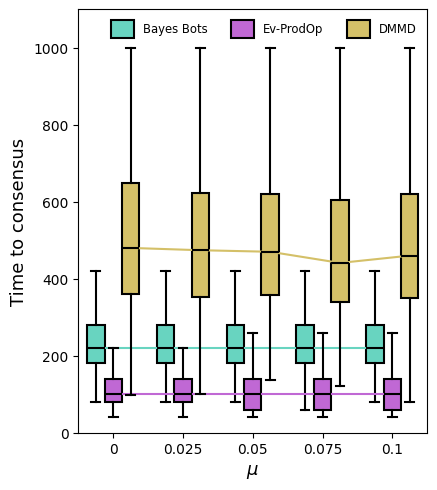

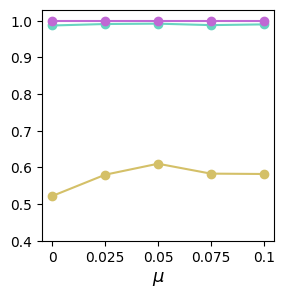

In [7]:
import matplotlib.pyplot as plt

sparameters = ['0', '25', '50', '75', '100']

positions = np.array((0.5, 2.5, 4.5, 6.5, 8.5))

# Set up graph
fig1, ax1 = plt.subplots(1,1, figsize = (4.5,5.5), dpi=100)
fig2, ax2 = plt.subplots(1,1, figsize = (3,3), dpi=100)

boxeses = []

for i, strategy in enumerate(['BBots-Mu-', 'SProdOp-Mu-', 'DMMD-Mu-']):
    ttcs = []
    accs = []
    for parameter in sparameters:
        time_to = Results['TTC'][strategy + parameter]
        acc = Results['ACC'][strategy + parameter]
        accs.append(acc)
        ttcs.append(time_to)
        
    boxes = ax1.boxplot(ttcs, sym="", positions=positions, patch_artist=True, whiskerprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5), flierprops=dict(linewidth=1.5), medianprops=dict(color='black', linewidth=1.5), boxprops=dict(facecolor = colours[i], linewidth=1.5))
    ax1.plot(positions, [np.median(ttc) for ttc in ttcs], color=colours[i])
    ax2.plot(accs, marker='o', color=colours[i])

    """
    for ii in range(4):
        t_val, p_val = stats.ttest_rel(ttcs[ii], ttcs[ii+1])
        ax1.text(txtPos[strategy[:3]][0]+0.07+(2*ii), txtPos[strategy[:3]][1], f"t_val = {t_val:.2f}\np_val = {p_val:.1e}", fontsize=6)

    ax1.text(0.05, txtPos[strategy[:3]][1]+10, f"{['Bayes Bots', 'Ev-ProdOp', 'DMMD'][i]}: ", fontsize=6)
    """

    boxeses.append(boxes['boxes'][0])

    positions += 0.5

ax1.legend(boxeses,
          ['Bayes Bots', 'Ev-ProdOp', 'DMMD'],
          ncols=3,
          fontsize='small',
          handlelength=2,
          handleheight=2,
          frameon = False)


# Formatting
ax1.set_xticks([1,3,5,7,9])
ax1.set_xticklabels(['0', '0.025', '0.05', '0.075', '0.1'])
ax1.set_ylabel('Time to consensus', fontsize=13)
ax1.set_xlabel('$μ$', fontsize=13)
ax1.set_ylim(0, 1100)

ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels(['0', '0.025', '0.05', '0.075', '0.1'])
#ax2.set_ylabel('Accuracy')
ax2.set_xlabel('$μ$', fontsize=13)
ax2.set_ylim(0.4, 1.03)

fig1.savefig(f"Plots/Mu1.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)
fig2.savefig(f"Plots/Mu2.pdf", dpi=600, bbox_inches='tight', pad_inches=0.1)

plt.show()

# TP, FP Figure making

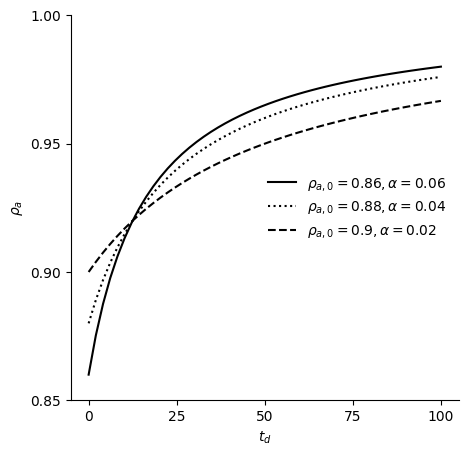

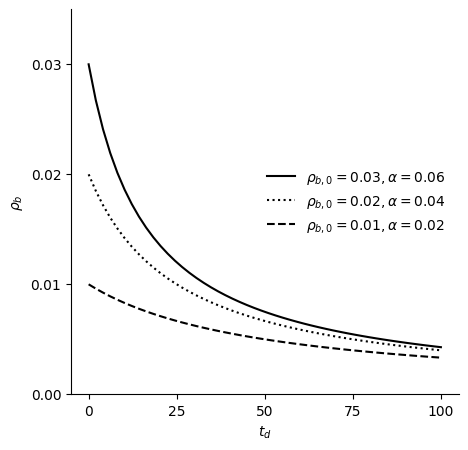

In [8]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


def get_true_positive(init_tp, tracking_time, alpha=0.2):
    """
    Get the true positive rate for a given time having tracked
    """
    true_positive = (init_tp + alpha*tracking_time)/(1 + alpha*tracking_time)
    return true_positive

def get_false_positive(init_fp, tracking_time, alpha=0.2):
    """
    Get the false positive rate for a given time having tracked
    """
    false_positive = 1 - ((1 - init_fp + alpha*tracking_time)/(1 + alpha*tracking_time))
    return false_positive

t = np.linspace(0,100)
tp = []

tp_parameter_pairs = [(0.86, 0.06), (0.88, 0.04), (0.9, 0.02)]

fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=100)


marker_style_idx = 0
markers = ['solid', 'dotted', 'dashed']
for pair in tp_parameter_pairs:
    for time in t:
        tp.append(get_true_positive(pair[0], time, pair[1]))
    ax.plot(t,tp, c='black', linestyle=markers[marker_style_idx])
    marker_style_idx += 1
    tp.clear()


ax.legend(['$ρ_{a,0} = $' + f'${tp_parameter_pairs[0][0]},\\alpha = {tp_parameter_pairs[0][1]}$',
           '$ρ_{a,0} = $' + f'${tp_parameter_pairs[1][0]},\\alpha = {tp_parameter_pairs[1][1]}$',
           '$ρ_{a,0} = $' + f'${tp_parameter_pairs[2][0]},\\alpha = {tp_parameter_pairs[2][1]}$'], 
           loc='center right', frameon=False)

ax.set_xlabel('$t_d$')
ax.set_ylim((0.85,1))
ax.set_ylabel('$ρ_a$')
ax.set_yticks([0.85, 0.9, 0.95, 1])
ax.set_xticks([0, 25, 50, 75, 100])
#plt.savefig('Plots/TP.pdf', dpi=600,bbox_inches='tight', pad_inches=0.1)
plt.show()

fp = []

fp_parameter_pairs = [(0.03, 0.06), (0.02, 0.04), (0.01, 0.02)]

marker_style_idx = 0


fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=100)

for pair in fp_parameter_pairs:
    for time in t:
        fp.append(get_false_positive(pair[0], time, pair[1]))
    ax.plot(t,fp, c='black', linestyle=markers[marker_style_idx])
    marker_style_idx += 1
    fp.clear()

ax.legend(['$ρ_{b,0} = $' + f'${fp_parameter_pairs[0][0]},\\alpha = {fp_parameter_pairs[0][1]}$',
           '$ρ_{b,0} = $' + f'${fp_parameter_pairs[1][0]},\\alpha = {fp_parameter_pairs[1][1]}$',
           '$ρ_{b,0} = $' + f'${fp_parameter_pairs[2][0]},\\alpha = {fp_parameter_pairs[2][1]}$'], 
           loc='center right', frameon=False)


ax.set_yticks([0, 0.01, 0.02, 0.03])
ax.set_xticks([0, 25, 50, 75, 100])

ax.set_xlabel('$t_d$')
ax.set_ylim((0,0.035))
ax.set_ylabel('$ρ_b$')
#plt.savefig('Plots/FP.pdf', dpi=600,bbox_inches='tight', pad_inches=0.1)
plt.show()


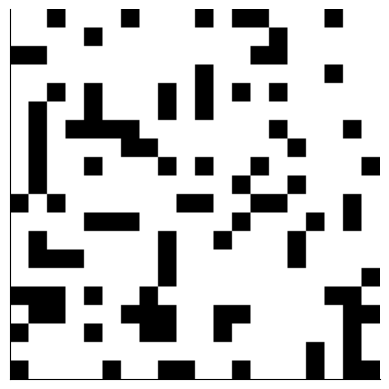

In [9]:
import itertools
import random
import numpy as np

def create_search_space(size, fill_ratio):
    search_space = np.zeros((size, size))
    # Each tile is ten by ten, so 100 tiles in the space, number of black tiles is that times the fill ratio
    num_tiles = 20 # Num tiles in each direction
    nunsafe_spots = int((num_tiles**2)*fill_ratio)
    tile_side_length = size//num_tiles
    # Generate a list of all the possible areas an unsafe spot could be in
    ij_poss_unsafe_spots = [list(range(0,size,tile_side_length)), list(range(0,size,tile_side_length))]
    poss_unsafe_spots = list(itertools.product(*ij_poss_unsafe_spots))
    # Add in unsafe spots and remove the index from the possible list until all the unsafe spots have been placed
    for _ in range(nunsafe_spots):
        
        indexes = random.choice(poss_unsafe_spots)
        search_space[indexes[0]:indexes[0]+tile_side_length, indexes[1]:indexes[1]+tile_side_length] = 1
        poss_unsafe_spots.remove(indexes)
    return search_space

ss = create_search_space(200, 0.25)

plt.imshow(ss, cmap="binary")

plt.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    left=False,      # ticks along the bottom edge are off        # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.savefig('Plots/search_space.pdf', dpi=600,bbox_inches='tight', pad_inches=0.1)

plt.show()
